In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
breast_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/brest_cancer.csv', na_values = '?')

In [32]:
display(breast_df)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


**Data Manipulation**

In [33]:
breast_df.isnull().sum()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marginal_adhesion          0
single_epith_cell_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [34]:
breast_df['bare_nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [35]:
breast_df.dropna(inplace = True)

In [36]:
breast_df.drop(['id'], axis = 1, inplace = True)

**EDA (Exploraitiry Data Analysis)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


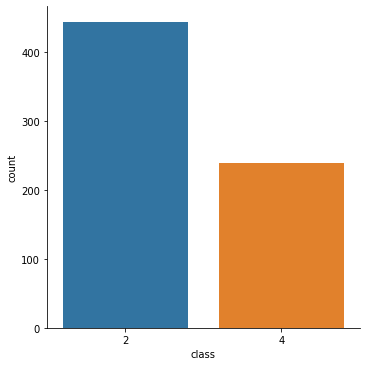

In [37]:
sns.catplot('class', kind = 'count', data = breast_df)

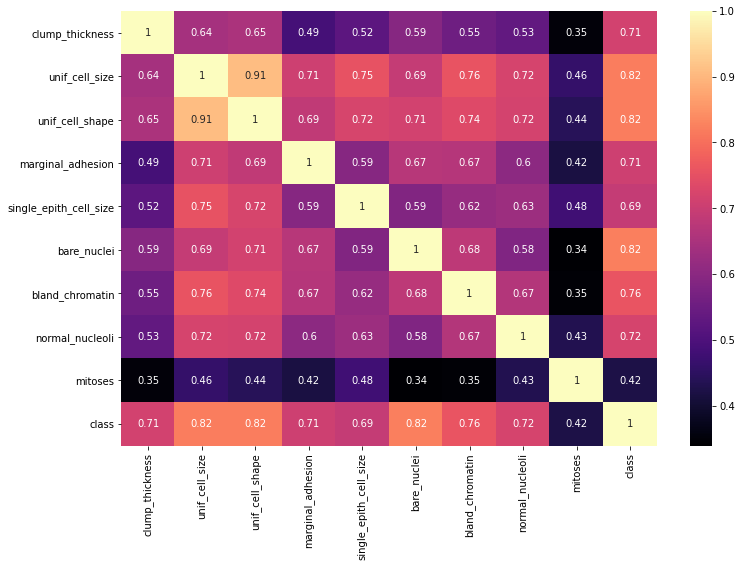

In [38]:
plt.figure(figsize = (12, 8))
sns.heatmap(breast_df.corr(), annot =True, cmap = 'magma')

**Train & Test Split**

In [39]:
X = breast_df.drop(['class'], axis = 1)

In [40]:
Y = breast_df['class']

In [41]:
X

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'liblinear', C = 1e7, max_iter=1e8, multi_class='ovr')

In [44]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='ovr', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [45]:
logit_model.score(X_test, Y_test)

0.9854014598540146

**Classification Metrics**

In [46]:
prediction = logit_model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, prediction)

array([[90,  0],
       [ 2, 45]])

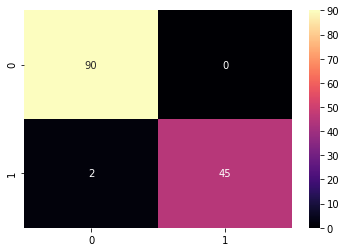

In [48]:
sns.heatmap(confusion_matrix(Y_test, prediction), cmap='magma', annot=True)

In [49]:
(84 + 47) / (84 + 47 + 6)

0.9562043795620438

**Task - To drop an column and see weather accuracy increases or decreases**

* Droping Column with multicollinearity


In [50]:
X1 = breast_df.drop(['class', 'unif_cell_size',], axis = 1)

In [51]:
Y1 = breast_df['class']

In [52]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1)

In [53]:
logit_model.fit(X1_train, Y1_train)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='ovr', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [54]:
logit_model.score(X1_test, Y1_test)

0.9927007299270073

In [55]:
prediction = logit_model.predict(X1_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y1_test, prediction)

array([[90,  0],
       [ 1, 46]])

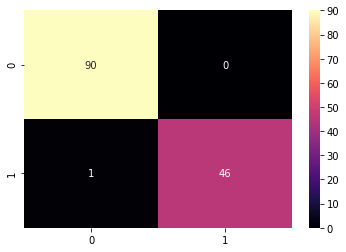

In [57]:
sns.heatmap(confusion_matrix(Y1_test, prediction), cmap='magma', annot=True)

In [58]:
(90 + 46)/(90 + 46 + 1)

0.9927007299270073

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99        90
           4       1.00      0.98      0.99        47

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



In [66]:
X_New = [[5, 1, 1, 2, 1.0, 3, 1, 1]]

In [67]:
X_data = pd.DataFrame(X_New)

In [68]:
np.round(logit_model.predict(X_data))

array([2])